In [2]:
import numpy as np
import pandas as pd

fin = open("5.txt", "r")
n = int(fin.readline())
n += 1
size_of_train = int(fin.readline())
train = [0] * size_of_train
Y_train = []
for i in range(size_of_train):
    train[i] = [int(x) for x in fin.readline().split()]
    Y_train.append(train[i][-1])
    train[i][-1] = 1
size_of_test = int(fin.readline())
test = [0] * size_of_test
Y_test = []
for i in range(size_of_test):
    test[i] = [float(x) for x in fin.readline().split()]
    Y_test.append(test[i][-1])
    test[i][-1] = 1
train = np.mat(train)
test = np.mat(test)
Y_train = np.mat(Y_train)
train.shape

(796, 628)

In [3]:
import matplotlib.pyplot as plt

In [4]:
sz = 1000
answer1 = [0] * sz
answer2 = [0] * sz
answer3 = [0] * sz
ans1 = [0] * sz
ans2 = [0] * sz
ans3 = [0] * sz

In [5]:
from tqdm import tqdm

In [6]:
def getAns(test, w, Y_test):
    arr = np.array(Y_test)
    Y_result = test * w.T
    diffs = np.array(Y_result.T - arr)
    return np.sqrt((diffs ** 2).mean()) / (arr.max() - arr.min())

In [7]:
triple = np.linalg.svd(train, full_matrices=False)
pseudoTrain = triple[2].T * np.linalg.inv(np.diag(triple[1] + 10 ** -4)) * triple[0].T
w = pseudoTrain * Y_train.T
matr1 = getAns(test, w.T, Y_test)
matr2 = getAns(train, w.T, Y_train)
for i in range(sz):
    answer1[i] = matr1
    ans1[i] = matr2


In [8]:
w = np.mat([0.] * n)
for i in tqdm(range(sz)):
    grad = (Y_train - w * train.T) * train
    grad *= 2 / n
    u = 10 ** (-16)
    w += u * grad
    answer2[i] = getAns(test, w, Y_test)
    ans2[i] = getAns(train, w, Y_train)
gradient = getAns(test, w, Y_test)
gradient

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.31it/s]


0.024990567503856274

In [9]:
w = np.mat([0.] * n)
for j in tqdm(range(sz)):
    for_minimum = [getAns(train, w, Y_train)]
    matr_minimum = [w + 0]
    for i in range(5):
        u = np.mat(np.random.normal(0, 10 ** -2, n))
        new_w = w + u;
        x = getAns(train, new_w, Y_train)
        for_minimum.append(x)
        matr_minimum.append(new_w)
    w = matr_minimum[np.argmin(for_minimum)]
    answer3[j] = getAns(test, w, Y_test)
    ans3[j] = getAns(train, w, Y_train)
evaluate = getAns(test, w, Y_test)
evaluate

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.73it/s]


0.014503160594919648

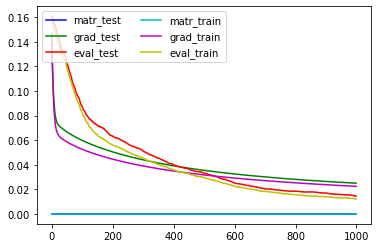

In [10]:
palette = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.plot(range(sz), answer1, color=palette[0], label="matr_test")
plt.plot(range(sz), answer2, color=palette[1], label="grad_test")
plt.plot(range(sz), answer3, color=palette[2], label="eval_test")
plt.plot(range(sz), ans1, color=palette[3], label="matr_train")
plt.plot(range(sz), ans2, color=palette[4], label="grad_train")
plt.plot(range(sz), ans3, color=palette[5], label="eval_train")
plt.legend(loc=2, ncol=2)
plt.show()